In [1]:
# This code cell is to get rid of annoying tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [10]:
import tensorflow as tf
import numpy as np

In [3]:
from tensorflow.keras.datasets import cifar10

In [31]:
cols = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
(X_train, y_train), (X_test_and_val, y_test_and_val) = cifar10.load_data()

In [5]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test_and_val, y_test_and_val, test_size=0.5, random_state=42)

X_train, X_test, X_val = X_train / 255, X_test / 255, X_val / 255

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
782/782 [==============================] - 26s 33ms/step - loss: 2.0142 - accuracy: 0.2553 - val_loss: 1.8519 - val_accuracy: 0.3318
Epoch 2/20
782/782 [==============================] - 28s 35ms/step - loss: 1.8716 - accuracy: 0.3167 - val_loss: 1.7730 - val_accuracy: 0.3672
Epoch 3/20
782/782 [==============================] - 28s 35ms/step - loss: 1.8208 - accuracy: 0.3385 - val_loss: 1.7143 - val_accuracy: 0.3870
Epoch 4/20
782/782 [==============================] - 30s 38ms/step - loss: 1.7843 - accuracy: 0.3531 - val_loss: 1.7019 - val_accuracy: 0.3866
Epoch 5/20
782/782 [==============================] - 40s 51ms/step - loss: 1.7534 - accuracy: 0.3669 - val_loss: 1.6589 - val_accuracy: 0.4136
Epoch 6/20
782/782 [==============================] - 38s 49ms/step - loss: 1.7392 - accuracy: 0.3700 - val_loss: 1.6844 - val_accuracy: 0.4020
Epoch 7/20
782/782 [==============================] - 43s 55ms/step - loss: 1.7222 - accuracy: 0.3749 - val_loss: 1.6597 - val_accuracy:

In [13]:
idk = np.argmax(model.predict(X_test), 1)

157/157 [==============================] - 1s 3ms/step


In [17]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 3ms/step - loss: 1.5537 - accuracy: 0.4490


[1.5536805391311646, 0.4490000009536743]

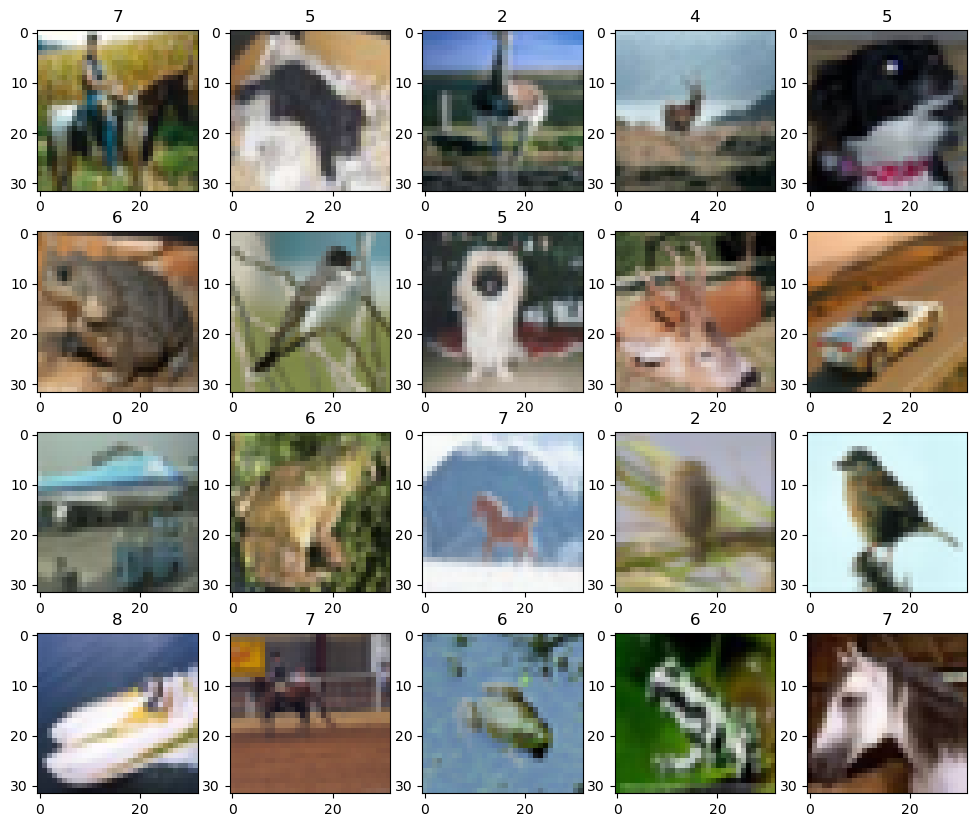

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))
columns = 5
rows = 4
for i in range(20):
    img = X_test[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.title()
plt.show()